In [56]:
# Import the relevant libraries 

import pandas as pd             # To manipulate the dataframe
import numpy as np              # Doing numerical operations
import matplotlib.pyplot as plt # Basic plotting
import seaborn as sns           # More Statistical plotting

### Data Preparation

In [57]:
df = pd.read_csv("/Users/mengxiaowang/Downloads/diabetes_prediction_dataset.csv")

# Look at the first few rows of data
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


##### Data Dictionary

- `gender`: Gender of the individual (Female or Male)
- `age`: Age of the individual
- `hypertension`: Whether the individual has hypertension (1 for yes, 0 for no)
- `heart_disease`: Whether the individual has heart disease (1 for yes, 0 for no)
- `smoking_history`: Smoking history of the individual
- `bmi`: Body Mass Index of the individual
- `HbA1c_level`: Hemoglobin A1c level
- `blood_glucose_level`: Blood glucose level
- `diabetes`: Target variable indicating whether the individual has diabetes (1 for yes, 0 for no)

In [58]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns')

We have 100000 rows and 9 columns


In [59]:
df.shape

(100000, 9)

In [60]:
df[df.duplicated(keep='first')].sort_values(['gender', 'age', 'HbA1c_level', 'blood_glucose_level'])

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
59468,Female,2.0,0,0,No Info,27.32,5.0,158,0
67439,Female,2.0,0,0,No Info,27.32,6.0,85,0
67234,Female,2.0,0,0,No Info,27.32,6.0,145,0
97294,Female,2.0,0,0,No Info,27.32,6.2,145,0
89701,Female,2.0,0,0,No Info,27.32,6.5,155,0
...,...,...,...,...,...,...,...,...,...
54794,Male,80.0,0,0,No Info,27.32,6.6,159,0
75961,Male,80.0,0,0,No Info,27.32,6.6,159,0
46764,Male,80.0,0,0,No Info,27.32,6.6,160,0
73316,Male,80.0,0,0,No Info,27.32,6.6,160,0


#### check datatypes and formats

In [61]:
# use df.info() to quickly check datatypes of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


- There are no null values.
- 'gender' and 'smoking_history' are object datatype, it means they contain categorical information.


We have 3854 duplicated rows, which translates to ~3% of our total dataset. Let's look into these in more detail.

In [62]:
# Using keep=False so we can see some duplicates side by side
df[df.duplicated(keep=False)]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [63]:
# .drop_duplicates() returns the entire dataframe without 
# the copy of the duplicated rows 
# (i.e any row which had duplicates has the duplicates removed)
# Assign that back to our variable bank_df
df = df.drop_duplicates()

# As an alternative you can use inplace=True
# df.drop_duplicates(inplace=True)

In [64]:
# Sanity Check
df.duplicated().sum()

0

In [65]:
# Checking for duplicate cols
# Transpose the dataframe first to make the columns the rows
df.T.duplicated()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

### Exploratory Data Analysis

Now that our data is clean, we can begin performing some initial exploration.
A good first stage is to examine our features one by one. By doing so we can get an idea about the shape of the distributions for each feature.

In [66]:
cat_cols = df.dtypes[df.dtypes.values == 'object'].index.tolist()

cat_cols

['gender', 'smoking_history']

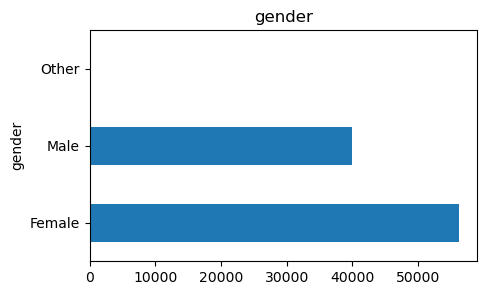

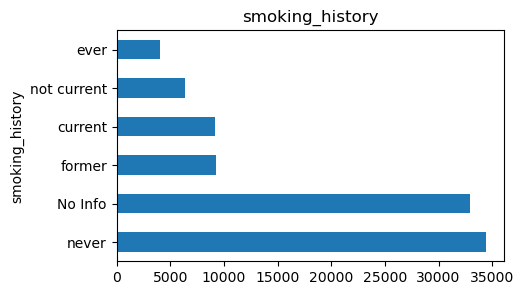

In [67]:
# Plot bar-charts for the categorical columns

for col in cat_cols:
    plt.figure(figsize=(5,3))
    # We can leverage pandas plotting within regular plt syntax
    df[col].value_counts().plot(kind='barh')
    plt.title(f'{col}')

    plt.show()

In [68]:
# numerical columns
num_cols = df.dtypes[df.dtypes.values != 'object'].index.tolist()
len(num_cols)


7

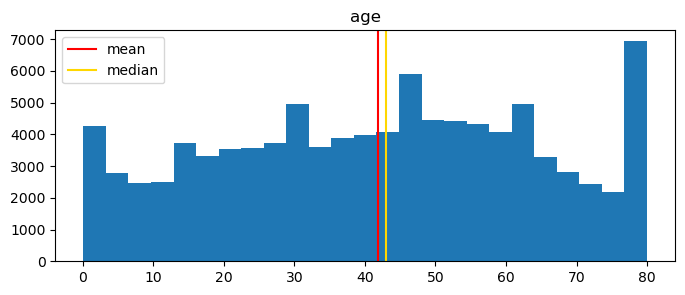

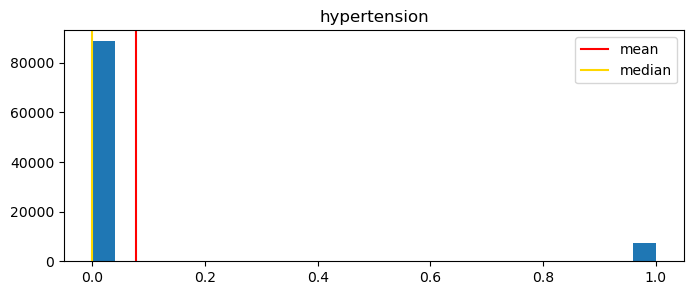

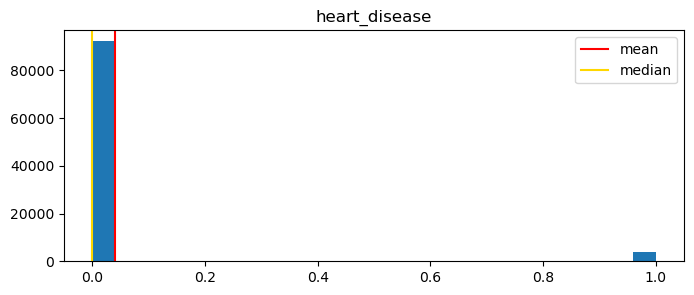

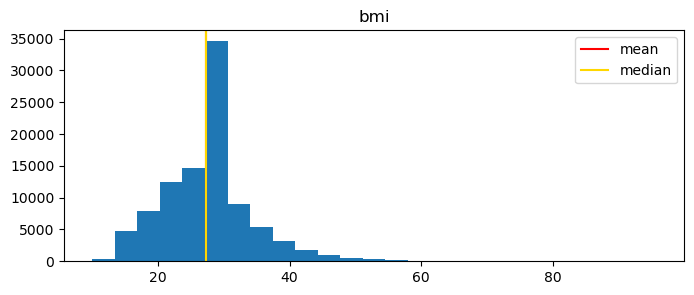

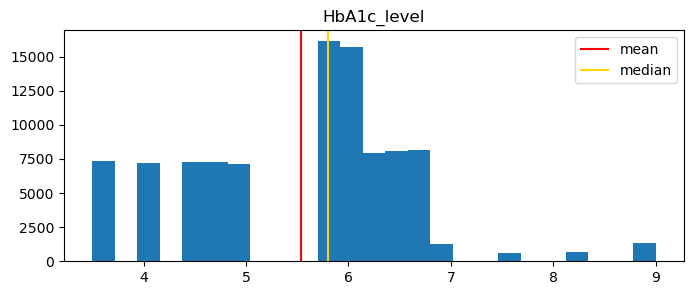

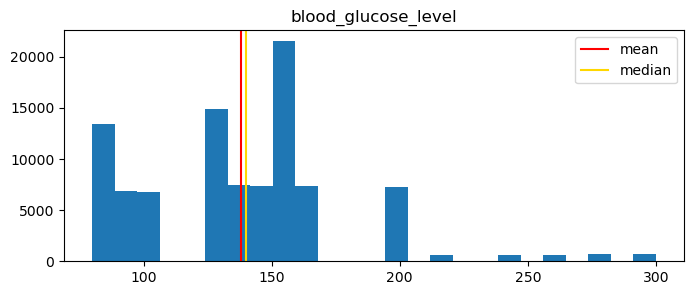

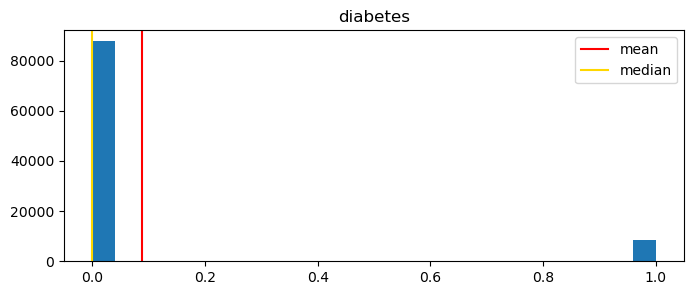

In [69]:
for col in num_cols:
    plt.figure(figsize=(8,3))

    # We can leverage pandas plotting within regular plt syntax
    plt.hist(df[col], bins=25)
    plt.title(f'{col}')
    plt.axvline(df[col].mean(), c='r', label='mean')
    plt.axvline(df[col].median(), c='gold', label='median')
    plt.legend()

    plt.show()

In [70]:
# To make things easier, we will encode the yes/no in 'registered' as 1/0

df['gender'] = np.where(df['gender'] == 'Female', 1, 0)

In [71]:
df['gender'].value_counts()

gender
1    56161
0    39985
Name: count, dtype: int64